In [ ]:
!pip install tensorflow_decision_forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 59.5 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv('train.csv')

# New Section

In [ ]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


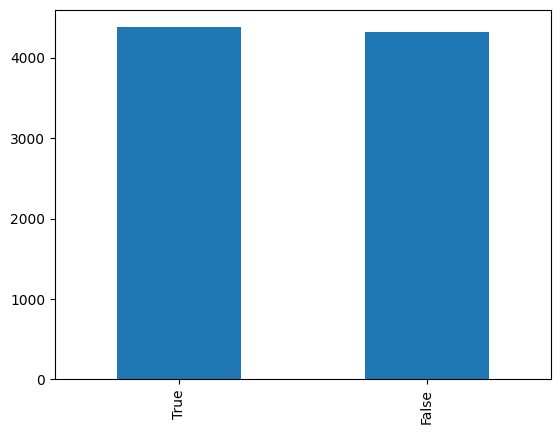

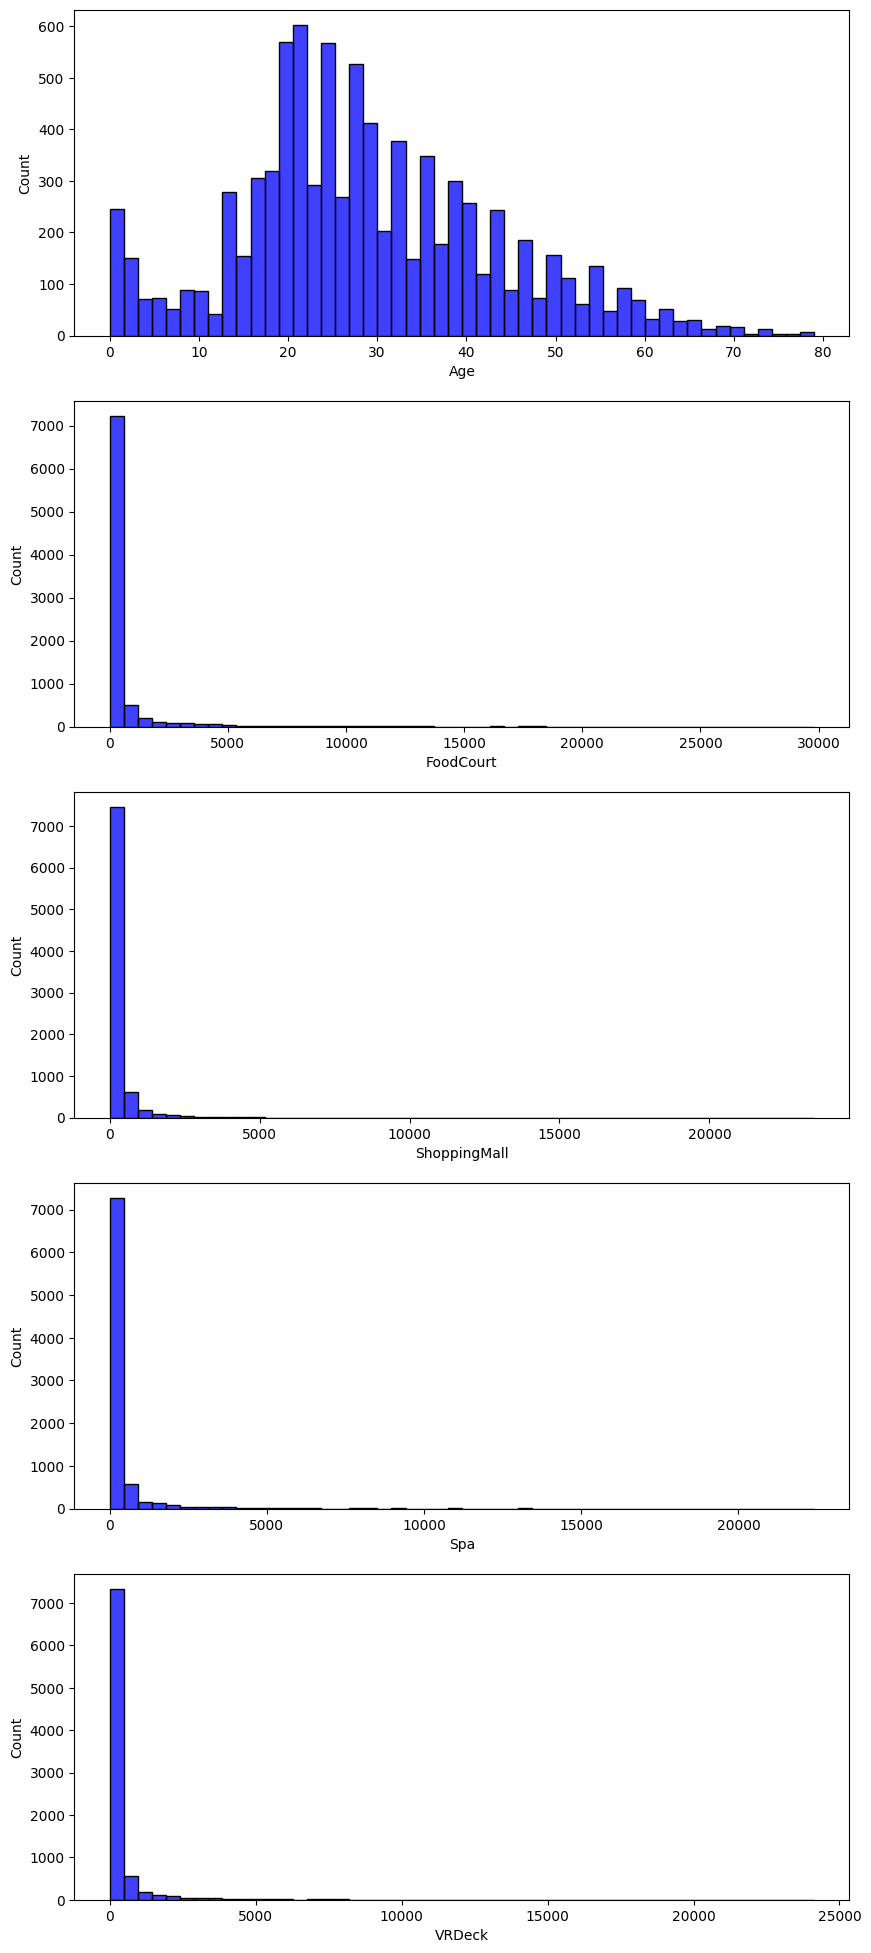

In [ ]:
plot_df = df.Transported.value_counts()
plot_df.plot(kind="bar")

fig, ax = plt.subplots(5,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(df['Age'], color='b', bins=50, ax=ax[0]);
sns.histplot(df['FoodCourt'], color='b', bins=50, ax=ax[1]);
sns.histplot(df['ShoppingMall'], color='b', bins=50, ax=ax[2]);
sns.histplot(df['Spa'], color='b', bins=50, ax=ax[3]);
sns.histplot(df['VRDeck'], color='b', bins=50, ax=ax[4]);

In [ ]:
headers=[['PassengerId','HomePlanet','CryoSleep','Cabin','Destination','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Name']]

In [ ]:
missing_data=df.isnull()
df.head(15)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [ ]:
missing_data["Cabin"].value_counts()

False    8494
True      199
Name: Cabin, dtype: int64

In [ ]:
missing_data["Age"].value_counts()

False    8514
True      179
Name: Age, dtype: int64

In [ ]:
df['Cabin'].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [ ]:
df.dropna(subset=['Cabin'], axis=0, inplace=True)

In [ ]:
df[["Deck", "Cabin_num", "Side"]] = df["Cabin"].str.split("/", expand=True)

In [ ]:
df = df.drop('Cabin', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8494 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8494 non-null   object 
 1   HomePlanet    8299 non-null   object 
 2   CryoSleep     8284 non-null   object 
 3   Destination   8316 non-null   object 
 4   Age           8319 non-null   float64
 5   VIP           8297 non-null   object 
 6   RoomService   8317 non-null   float64
 7   FoodCourt     8316 non-null   float64
 8   ShoppingMall  8288 non-null   float64
 9   Spa           8313 non-null   float64
 10  VRDeck        8310 non-null   float64
 11  Name          8296 non-null   object 
 12  Transported   8494 non-null   bool   
 13  Deck          8494 non-null   object 
 14  Cabin_num     8494 non-null   object 
 15  Side          8494 non-null   object 
dtypes: bool(1), float64(6), object(9)
memory usage: 1.0+ MB


In [ ]:
#We are replacing the nan values present in the following columns with mean value of that column
avg_Roomservice = df["RoomService"].astype('float').mean(axis=0)
#axis = 0, means along the rows
avg_Roomservice

221.95467115546472

In [ ]:
df["RoomService"].replace(np.nan, avg_Roomservice, inplace=True)

In [ ]:
avg_Foodcourt = df["FoodCourt"].astype('float').mean(axis=0)

In [ ]:
df["FoodCourt"].replace(np.nan,avg_Foodcourt , inplace=True)

In [ ]:
avg_ShoppingMall = df["ShoppingMall"].astype('float').mean(axis=0)

In [ ]:
df["ShoppingMall"].replace(np.nan,avg_ShoppingMall , inplace=True)

In [ ]:
avg_Spa = df["Spa"].astype('float').mean(axis=0)

In [ ]:
df["Spa"].replace(np.nan,avg_Spa , inplace=True)

In [ ]:
avg_VRDeck = df["VRDeck"].astype('float').mean(axis=0)

In [ ]:
df["VRDeck"].replace(np.nan,avg_VRDeck , inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
#most_freuent was used beacause age should be whole nos
imputer.fit(df[['HomePlanet','CryoSleep','Destination','Age','VIP']])
df[['HomePlanet','CryoSleep','Destination','Age','VIP']] = imputer.transform(df[['HomePlanet','CryoSleep','Destination','Age','VIP']])

In [ ]:
#df.dropna(subset=['Cabin'], axis=0, inplace=True)

In [ ]:
df.drop('Name',axis=1, inplace=True)
df.drop('PassengerId',axis=1, inplace=True)

In [ ]:
missing_data=df.isnull()


In [ ]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

HomePlanet
False    8494
Name: HomePlanet, dtype: int64

CryoSleep
False    8494
Name: CryoSleep, dtype: int64

Destination
False    8494
Name: Destination, dtype: int64

Age
False    8494
Name: Age, dtype: int64

VIP
False    8494
Name: VIP, dtype: int64

RoomService
False    8494
Name: RoomService, dtype: int64

FoodCourt
False    8494
Name: FoodCourt, dtype: int64

ShoppingMall
False    8494
Name: ShoppingMall, dtype: int64

Spa
False    8494
Name: Spa, dtype: int64

VRDeck
False    8494
Name: VRDeck, dtype: int64

Transported
False    8494
Name: Transported, dtype: int64

Deck
False    8494
Name: Deck, dtype: int64

Cabin_num
False    8494
Name: Cabin_num, dtype: int64

Side
False    8494
Name: Side, dtype: int64



In [ ]:
df['Transported'] = df['Transported'].astype(int)
df['VIP'] = df['VIP'].astype(int)
df['CryoSleep'] = df['CryoSleep'].astype(int)

In [ ]:
df.head(10)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.000000,0,B,0,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.000000,1,F,0,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.000000,0,A,0,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.000000,0,A,0,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.000000,1,F,1,S
5,Earth,0,PSO J318.5-22,44.0,0,0.0,483.0,0.0,291.0,0.000000,1,F,0,P
6,Earth,0,TRAPPIST-1e,26.0,0,42.0,1539.0,3.0,0.0,0.000000,1,F,2,S
7,Earth,1,TRAPPIST-1e,28.0,0,0.0,0.0,0.0,0.0,306.132371,1,G,0,S
8,Earth,0,TRAPPIST-1e,35.0,0,0.0,785.0,17.0,216.0,0.000000,1,F,3,S
9,Europa,1,55 Cancri e,14.0,0,0.0,0.0,0.0,0.0,0.000000,1,B,1,P


In [ ]:
df['Destination'].unique()
df['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [ ]:
#Using label encoder for converting into numeric data
data = {'Destination':['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e']}
df['Destination']=le.fit_transform(df['Destination'])

data = {'HomePlanet':['Europa', 'Earth', 'Mars']}
df['HomePlanet']=le.fit_transform(df['HomePlanet'])

df.head(10)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.000000,0,B,0,P
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.000000,1,F,0,S
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.000000,0,A,0,S
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.000000,0,A,0,S
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.000000,1,F,1,S
5,0,0,1,44.0,0,0.0,483.0,0.0,291.0,0.000000,1,F,0,P
6,0,0,2,26.0,0,42.0,1539.0,3.0,0.0,0.000000,1,F,2,S
7,0,1,2,28.0,0,0.0,0.0,0.0,0.0,306.132371,1,G,0,S
8,0,0,2,35.0,0,0.0,785.0,17.0,216.0,0.000000,1,F,3,S
9,1,1,0,14.0,0,0.0,0.0,0.0,0.0,0.000000,1,B,1,P


In [ ]:
def split_dataset(dataset, test_ratio=0.20):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(df)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

6793 examples in training, 1701 examples in testing.


In [ ]:
label='Transported'

In [ ]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label)

In [ ]:
tfdf.keras.RandomForestModel()

Use /tmp/tmpbdiojb8m as temporary training directory


In [ ]:
rf = tfdf.keras.RandomForestModel()

Use /tmp/tmpisl6lj5r as temporary training directory


In [ ]:
rf.fit(x=train_ds)


Reading training dataset...
Training dataset read in 0:00:03.627395. Found 6793 examples.
Training model...
Model trained in 0:00:52.284785
Compiling model...
Model compiled.


In [ ]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

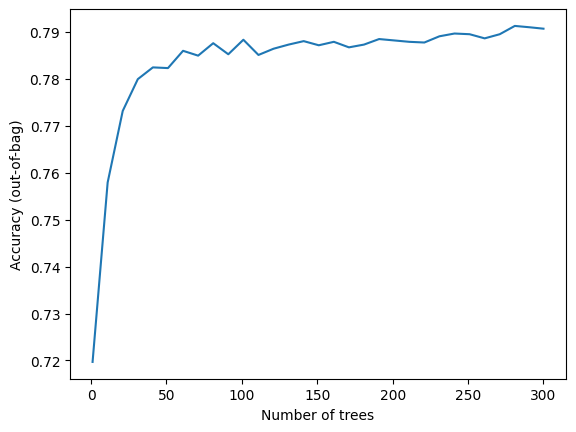

In [ ]:
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")
plt.show()

In [ ]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=6793, accuracy=0.7906668629471515, loss=0.5383896555498063, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [ ]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

2/2 [==============================] - 0s 59ms/step - loss: 0.0000e+00
loss: 0.0000


In [ ]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)


Available variable importances:
	 NUM_NODES
	 NUM_AS_ROOT
	 SUM_SCORE
	 INV_MEAN_MIN_DEPTH


In [ ]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("CryoSleep" (1; #2), 102.0),
 ("Spa" (1; #10), 68.0),
 ("RoomService" (1; #7), 54.0),
 ("VRDeck" (1; #12), 45.0),
 ("ShoppingMall" (1; #8), 18.0),
 ("FoodCourt" (1; #5), 10.0),
 ("HomePlanet" (1; #6), 2.0),
 ("Deck" (4; #3), 1.0)]

try to different approach
use neural network
can use

In [ ]:
test_df = pd.read_csv('test.csv')
submission_id = test_df.PassengerId
test_df[['VIP', 'CryoSleep']] = test_df[['VIP', 'CryoSleep']].fillna(value=0)
test_df[["Deck", "Cabin_num", "Side"]] = test_df["Cabin"].str.split("/", expand=True)
test_df = test_df.drop('Cabin', axis=1)
test_df['VIP'] = test_df['VIP'].astype(int)
test_df['CryoSleep'] = test_df['CryoSleep'].astype(int)
data = {'Destination':['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e']}
test_df['Destination']=le.fit_transform(test_df['Destination'])
data = {'HomePlanet':['Europa', 'Earth', 'Mars']}
test_df['HomePlanet']=le.fit_transform(test_df['HomePlanet'])
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df)
predictions = rf.predict(test_ds)
n_predictions = (predictions > 0.5).astype(bool)
output = pd.DataFrame({'PassengerId': submission_id,
                       'Transported': n_predictions.squeeze()})

output.head()

5/5 [==============================] - 0s 53ms/step


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
